In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Configure plotting
plt.style.use("seaborn-v0_8")
sns.set_theme()



In [5]:

df = pd.read_csv(r"C:\Users\muru_\OneDrive\Desktop\codeAlpha internship\dataset\Unemployment_data.csv")


In [8]:
print(df.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [9]:
# Parse dates (dayfirst=True for Indian format like 31-05-2019)
df[' Date'] = pd.to_datetime(df[' Date'], dayfirst=True)

# Sort by date
df = df.sort_values(' Date')


In [10]:

# Keep only relevant columns
df = df[['Region', ' Date', ' Estimated Unemployment Rate (%)']]
df = df.rename(columns={' Estimated Unemployment Rate (%)': 'UnemploymentRate'})



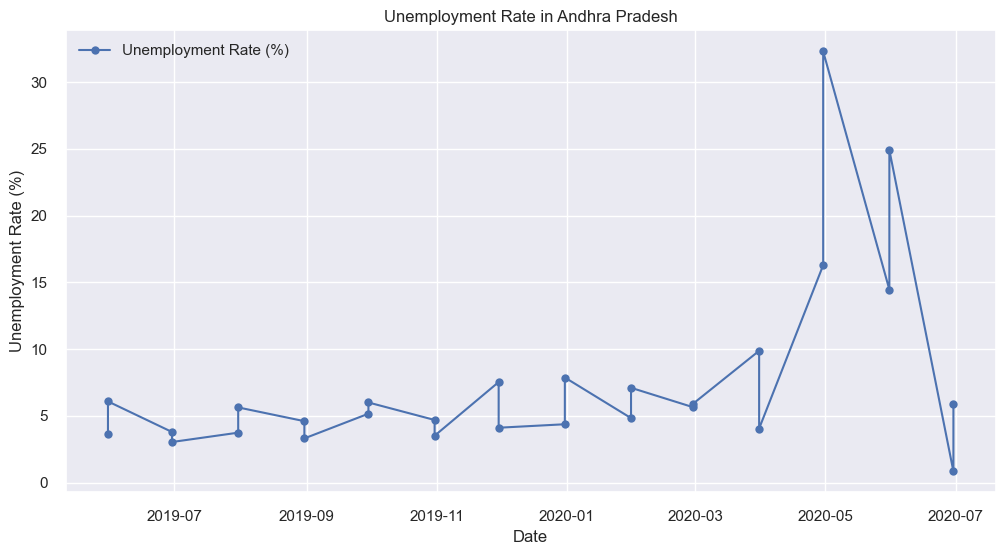

In [11]:
state = "Andhra Pradesh"
df_state = df[df['Region'] == state].set_index(' Date')

# Plot time series
plt.figure(figsize=(12,6))
plt.plot(df_state.index, df_state['UnemploymentRate'], marker='o', label="Unemployment Rate (%)")
plt.title(f"Unemployment Rate in {state}")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# Rolling averages (3-month and 12-month)
df_state['Rolling_3M'] = df_state['UnemploymentRate'].rolling(3).mean()
df_state['Rolling_12M'] = df_state['UnemploymentRate'].rolling(12).mean()


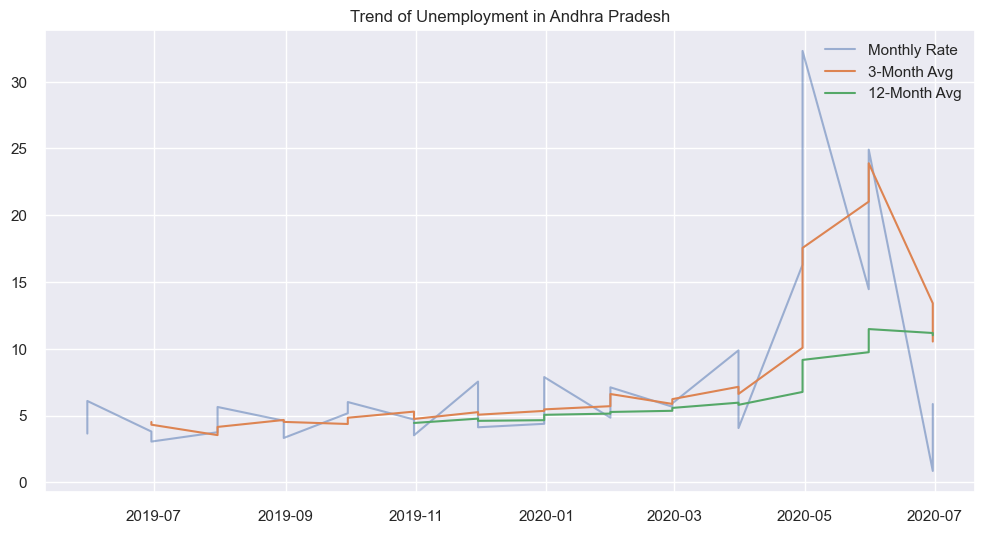

In [13]:

plt.figure(figsize=(12,6))
plt.plot(df_state.index, df_state['UnemploymentRate'], alpha=0.5, label="Monthly Rate")
plt.plot(df_state.index, df_state['Rolling_3M'], label="3-Month Avg")
plt.plot(df_state.index, df_state['Rolling_12M'], label="12-Month Avg")
plt.title(f"Trend of Unemployment in {state}")
plt.legend()
plt.show()


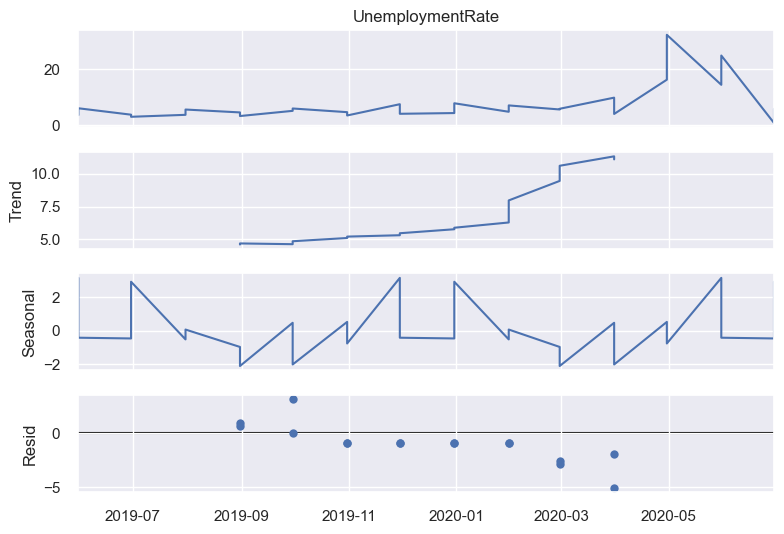

In [14]:
# Seasonal decomposition (if at least 2 years of data)
if len(df_state) > 24:
    decomposition = seasonal_decompose(df_state['UnemploymentRate'], model='additive', period=12)
    decomposition.plot()
    plt.show()


In [15]:

# Covid impact analysis
pre_covid = df_state.loc[:'2019-12']['UnemploymentRate'].mean()
covid_2020 = df_state.loc['2020-01':'2020-12']['UnemploymentRate'].mean()
post_covid = df_state.loc['2021-01':]['UnemploymentRate'].mean()

print(f"Average Unemployment Rate in {state}:")
print(f"  Pre-Covid (till 2019): {pre_covid:.2f}%")
print(f"  Covid Year (2020): {covid_2020:.2f}%")
print(f"  Post-Covid (2021+): {post_covid:.2f}%")


Average Unemployment Rate in Andhra Pradesh:
  Pre-Covid (till 2019): 4.83%
  Covid Year (2020): 11.01%
  Post-Covid (2021+): nan%


C:\Users\muru_\AppData\Local\Temp\ipykernel_26348\672185184.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues")


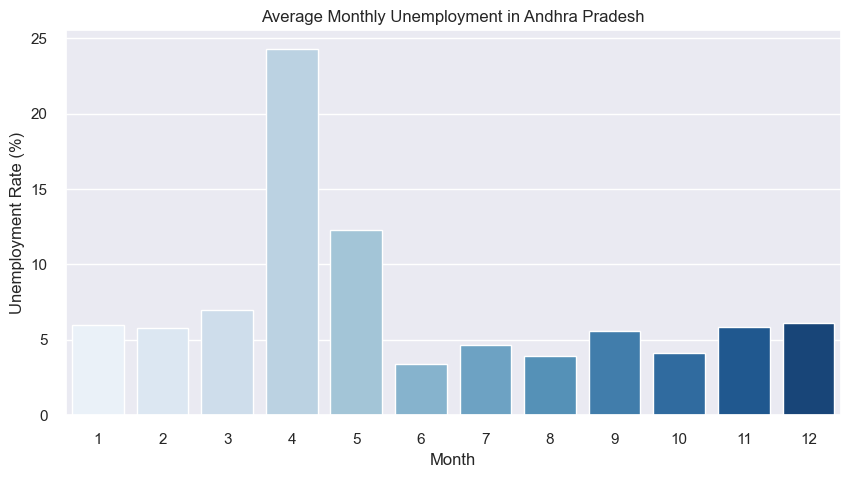

In [16]:
# Seasonal monthly pattern
df_state['Month'] = df_state.index.month
monthly_avg = df_state.groupby('Month')['UnemploymentRate'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, palette="Blues")
plt.title(f"Average Monthly Unemployment in {state}")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()


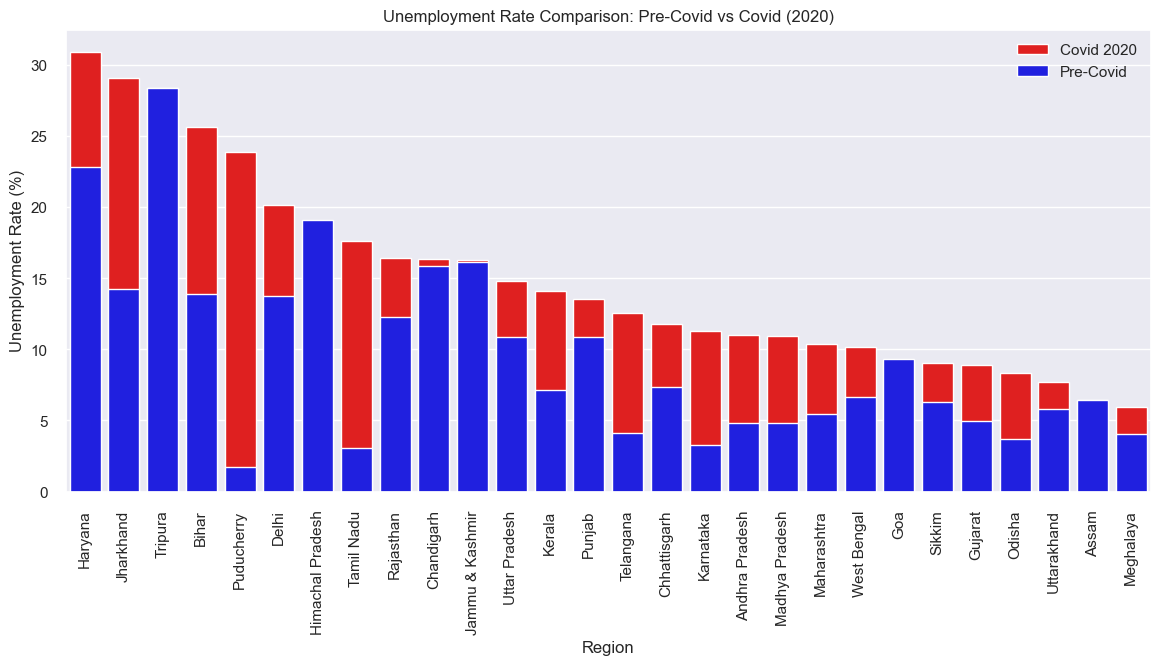

In [18]:
#-------------------------------------
# 4. Regional comparison
# -------------------------------------

# Covid impact by region
impact_summary = []
regions = df['Region'].unique()

for region in regions:
    df_r = df[df['Region'] == region].set_index(' Date')
    pre = df_r.loc[:'2019-12']['UnemploymentRate'].mean()
    covid = df_r.loc['2020-01':'2020-12']['UnemploymentRate'].mean()
    post = df_r.loc['2021-01':]['UnemploymentRate'].mean()
    impact_summary.append([region, pre, covid, post])

impact_df = pd.DataFrame(impact_summary, columns=["Region", "PreCovid", "Covid2020", "PostCovid"])

# Plot comparison (Covid vs Pre-Covid)
plt.figure(figsize=(14,6))
impact_df_sorted = impact_df.sort_values("Covid2020", ascending=False)
sns.barplot(data=impact_df_sorted, x="Region", y="Covid2020", color="red", label="Covid 2020")
sns.barplot(data=impact_df_sorted, x="Region", y="PreCovid", color="blue", label="Pre-Covid")
plt.xticks(rotation=90)
plt.title("Unemployment Rate Comparison: Pre-Covid vs Covid (2020)")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.show()


In [19]:
# -------------------------------------
# 5. Save processed data
# -------------------------------------
df.to_csv("cleaned_unemployment_data.csv", index=False)
impact_df.to_csv("covid_impact_by_region.csv", index=False)
print("✅ Analysis complete. Cleaned data and Covid impact summary saved.")

✅ Analysis complete. Cleaned data and Covid impact summary saved.
